In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
# Read data
df = pd.read_csv("data/dat.csv", sep=',', index_col=False)
print(df)

   Unnamed: 0   x1   x2
0           1  1.1  6.5
1           2  2.1  6.5
2           3  2.1  5.5
3           4  1.1  4.5
4           5  2.1  3.5
5           6 -0.9 -2.5
6           7 -1.9 -4.5
7           8 -0.9 -5.5
8           9 -2.9 -6.5
9          10 -1.9 -7.5


In [89]:
# View data
X = df.iloc[:,1:]
print(X)

    x1   x2
0  1.1  6.5
1  2.1  6.5
2  2.1  5.5
3  1.1  4.5
4  2.1  3.5
5 -0.9 -2.5
6 -1.9 -4.5
7 -0.9 -5.5
8 -2.9 -6.5
9 -1.9 -7.5


<AxesSubplot:xlabel='x1', ylabel='x2'>

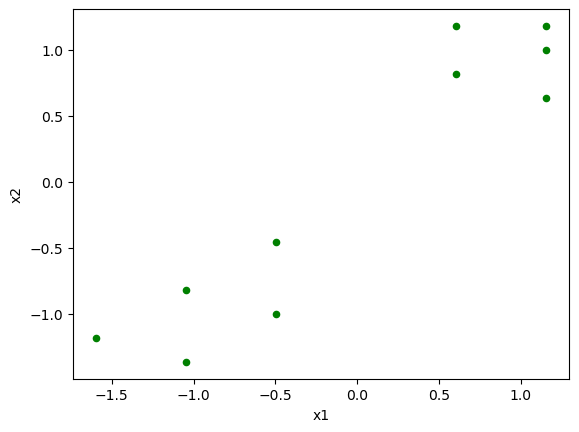

In [77]:
X.plot.scatter(x='x1', y='x2', c='g')

In [28]:
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

In [33]:
#Calcualting the correlation matrix of the data
X_corr = (1 / 10)* X.T.dot(X)

Text(0.5, 1.0, 'Correlation matrix')

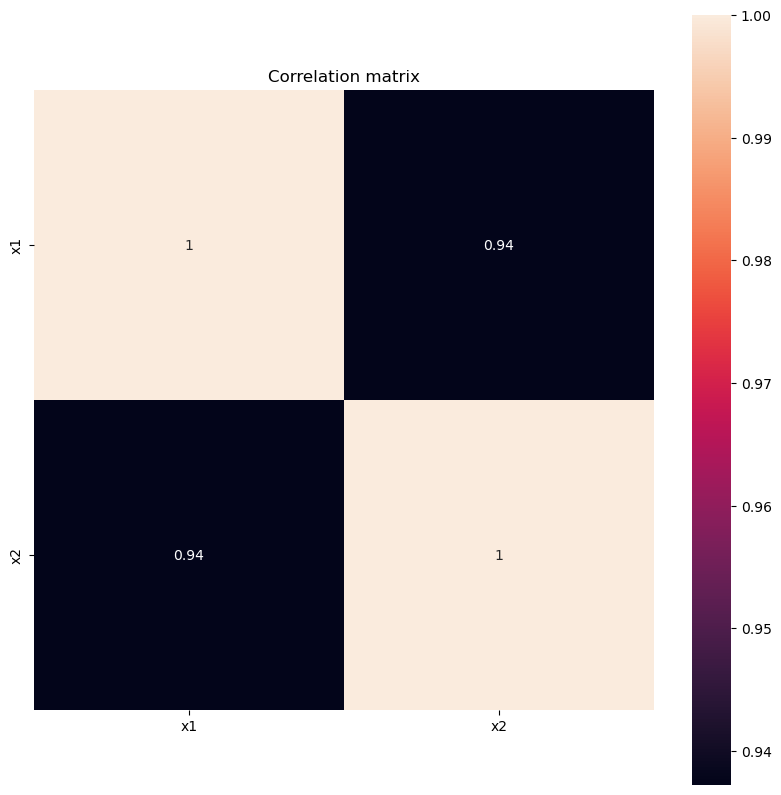

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True, annot=True)
plt.title('Correlation matrix')

In [54]:
# exact eigen values and eigen vectors
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([1.93724034, 0.06275966]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [45]:
# sum of eing values == number of variables ?
np.sum(eig_values) == 2

True

Text(0.5, 0, 'Dimensions')

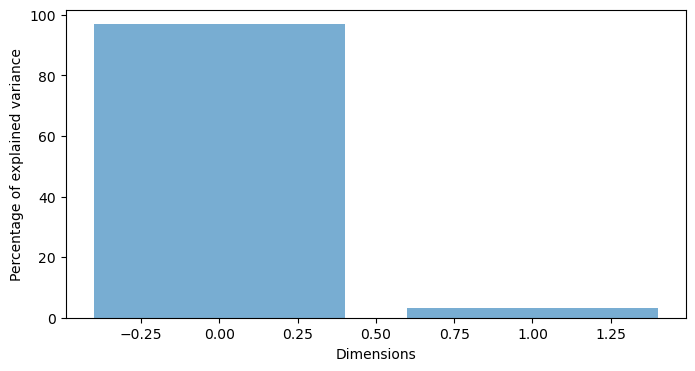

In [50]:
# plotting the variance explained by each PC 
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(2), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')


In [ ]:
# this bar chart shows that the first dimension will be enough to present
# the data

In [105]:
# calculating our new axis // pca scores?
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])
score_df = pd.DataFrame({'PC1': pc1,
                            'PC2' : pc2})
score_df.iloc[:,0]

0   -5.374012
1   -6.081118
2   -5.374012
3   -3.959798
4   -3.959798
5    2.404163
6    4.525483
7    4.525483
8    6.646804
9    6.646804
Name: PC1, dtype: float64

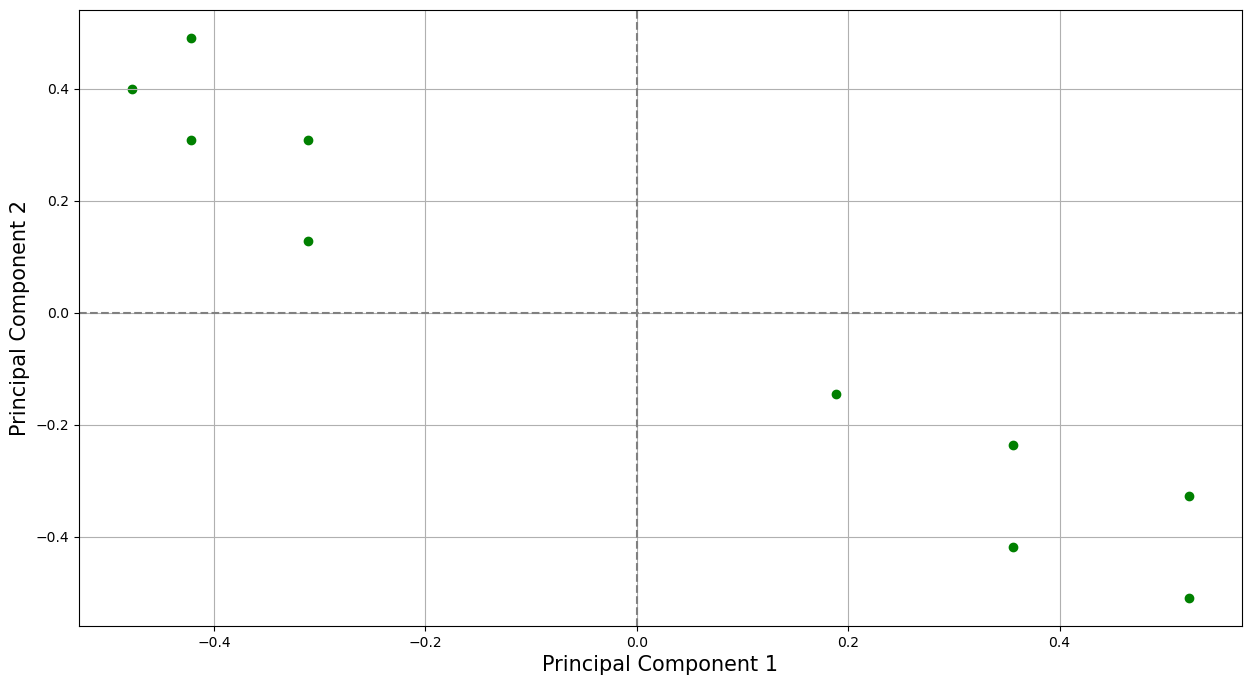

In [107]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize = (15, 8))
    xs = score_df.iloc[:,0]
    ys = score_df.iloc[:,1]
    n=score_df.shape[1]
    # scaling x and y
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(pc1*scalex, pc2*scaley, c = 'g')
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.show()
plot_scatter(pc1, pc2)

In [63]:
a = np.array([[1, 2], [2, 3]])
b = np.array([3, 4])
c = a.T * b
c

array([[ 3,  8],
       [ 6, 12]])

In [81]:
# pca loadings = correlation between old variables and principle components (eigenverktors)
pcloading = eig_vectors.T*np.sqrt(eig_values)
loading_matrix = pd.DataFrame(pcloading, columns=['PC1', 'PC2'], index=X.columns)
loading_matrix

,PC1,PC2
x1,-0.984185,-0.177144
x2,-0.984185,0.177144


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

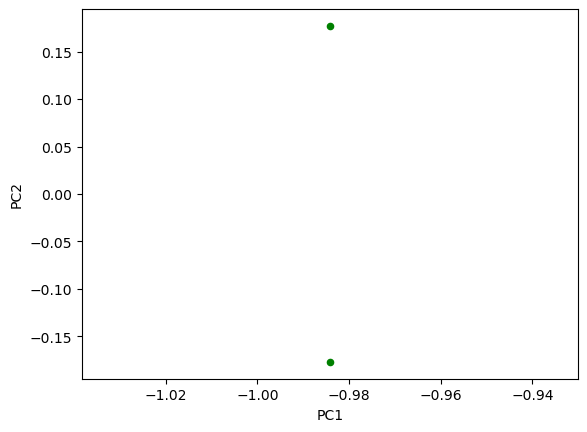

In [82]:
loading_matrix.plot.scatter(x='PC1', y='PC2', c='g')

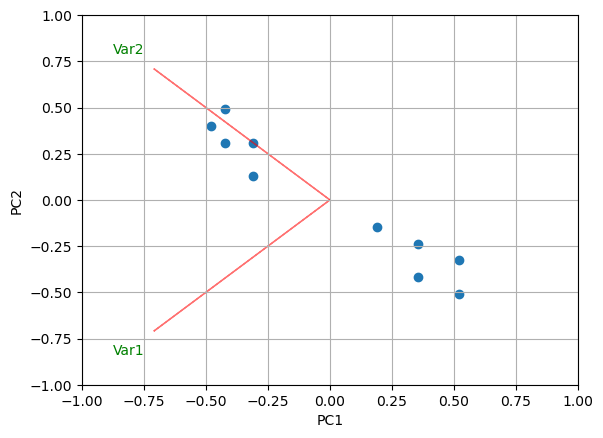

In [106]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1 = pcax - 1
    pca2 = pcay - 1
    xs = score.iloc[:,pca1]
    ys = score.iloc[:,pca2]
    n=score.shape[1]
    # scaling x and y
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

biplot(score_df,eig_vectors,1,2,labels=None)
